# red_wine_quality dataset linear training

## data preparation

In [1]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('/content/wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# normalization
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

FileNotFoundError: [Errno 2] No such file or directory: '/content/boston_housing (1).csv'

## architecture of model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential ([
                      layers.Dense(512, activation='relu', input_shape=[11]),
                      layers.Dense(512, activation='relu'),
                      layers.Dense(512, activation='relu'),
                      layers.Dense(1)
                        ])


# optimizer and loss function

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'mae'
)

# training the model

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

# plotting the loss

In [ ]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df['loss'].plot();

## ---------------------21 march-----------------------------

In [ ]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('/content/archive_3.zip')

# Create training and validation splits

df_train = red_wine.sample(frac=0.7 , random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Normalization
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)

])

model.compile(
    optimizer ='adam',
    loss ='mae'
)


Minimum validation loss: 0.09023857116699219


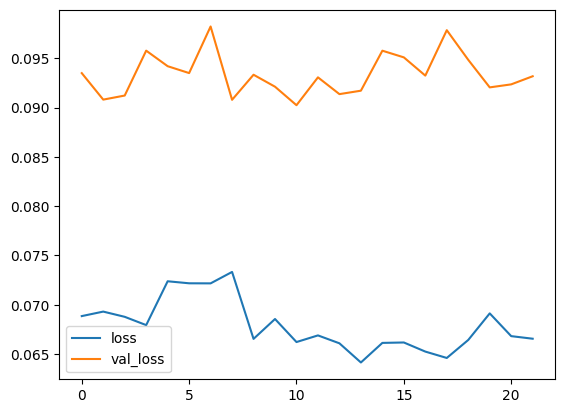

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # do not print output
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
